In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import proplot

# # Plotting parameters, proplot uisage is optional, but adds nice aesthetics:
# proplot.rc['figure.facecolor'] = 'white'
# proplot.rc.update(
#     linewidth=1, fontsize=9,
#     color='dark blue', suptitlecolor='dark blue',
#     titleloc='upper center', titlecolor='dark blue', titleborder=False,
# )

# mpl.rcParams['font.sans-serif'] = "Arial" # Set the font
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['grid.alpha'] = 0 # Remove the grid
mpl.rcParams['xtick.major.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.major.left'] = True
mpl.rcParams['xtick.minor.bottom'] = True # Remove minor ticks
mpl.rcParams['ytick.minor.left'] = True
mpl.rcParams['ytick.minor.right'] = False
mpl.rcParams['axes.spines.right'] = False # switch off top and right spines
mpl.rcParams['axes.spines.top'] = False

import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import glob
%matplotlib inline

### Parse benchmark outputs

In [103]:
benchmark_outputs = glob.glob("./benchmarks/*gpu*")
len(benchmark_outputs)

53

In [104]:
benchmark_table = []
for output in benchmark_outputs:
    
    fname = output.split('/')[-1]
    test = fname.split('.')[1]
    n_beads = fname.split('.')[2]
    machine = fname.split('.')[3]
    mode_compaction = fname.split('.')[4]
    backend = fname.split('.')[5]
    
    df = pd.read_table(output)
    
    df.loc[:, 'test_name'] = test
    df.loc[:, 'n_beads'] = int(n_beads)
    df.loc[:, 'machine'] = machine
    df.loc[:, 'mode_compaction'] = mode_compaction
    df.loc[:, 'backend'] = backend
    
    benchmark_table.append(df.copy())
    del df

In [105]:
benchmark_table = pd.concat(benchmark_table).sort_values('n_beads')

In [106]:
len(benchmark_table)

203

In [94]:
benchmark_table.tail(10)

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,test_name,n_beads,machine,mode_compaction,backend
2,4343.8520,1:12:23,8501.38,36193.47,8363.73,8415.31,0.0,29320.25,99.71,4345.12,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd
3,4361.9542,1:12:41,9249.27,37710.24,9098.39,9155.50,0.0,39087.09,99.25,4349.44,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd
3,4567.9473,1:16:07,3651.55,39619.18,3588.39,3600.60,0.0,9270.02,99.89,4572.95,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm
4,4511.6514,1:15:11,2486.95,38456.21,2423.96,2436.17,0.0,11585.95,99.78,4515.60,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm
0,4404.3202,1:13:24,8501.93,35682.34,8363.69,8415.41,0.0,9727.89,99.71,4392.43,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd
1,3185.8760,0:53:05,9695.05,39976.64,9576.02,9621.05,0.0,0.03,99.65,3180.69,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-dpd
2,3214.8239,0:53:34,9608.98,40065.95,9489.86,9534.99,0.0,0.04,99.72,3216.27,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-dpd
4,4364.4832,1:12:44,8231.16,35146.15,8083.05,8138.74,0.0,48814.85,99.22,4357.03,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd
2,4534.0743,1:15:34,2920.62,38895.20,2857.12,2869.50,0.0,6954.26,99.96,4539.12,gpu-test,2560000,ip-172-31-34-148,constant_density,openmm
0,3160.1276,0:52:40,9820.41,40040.59,9704.05,9748.34,0.0,0.02,99.52,3145.71,gpu-test,2560000,ip-172-31-34-148,constant_density,hoomd-dpd


In [95]:
benchmark_table.loc[:, 'n_beads'] = benchmark_table.n_beads.astype(int)

In [96]:
np.unique( benchmark_table.machine )

array(['ip-172-31-34-148'], dtype=object)

In [97]:
benchmark_table.loc[:, "GPU type"] = benchmark_table.machine.map({
    'ip-172-31-34-148': 'Tesla V100-SXM2-16GB',
})

In [98]:
machines_order = ['ip-172-31-34-148']

In [99]:
n_beads_order = [1000, 4000, 10000, 40000, 80000, 200000, 240000, 320000, 400000, 640000]

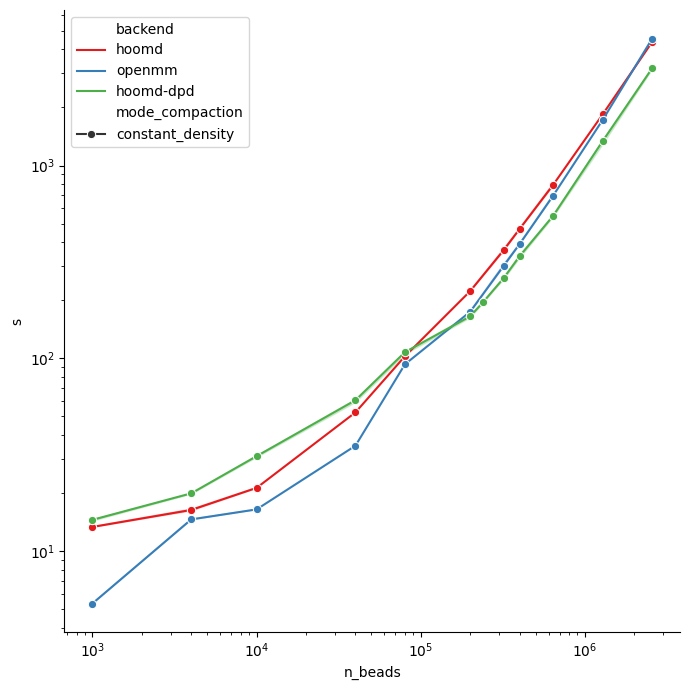

In [109]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table.query('mode_compaction=="constant_density" and backend!="hoomd-no-writing"'), 
            x='n_beads', y='s',
            hue='backend', 
            style='mode_compaction',
            markers=True, 
            palette='Set1',
            )

plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

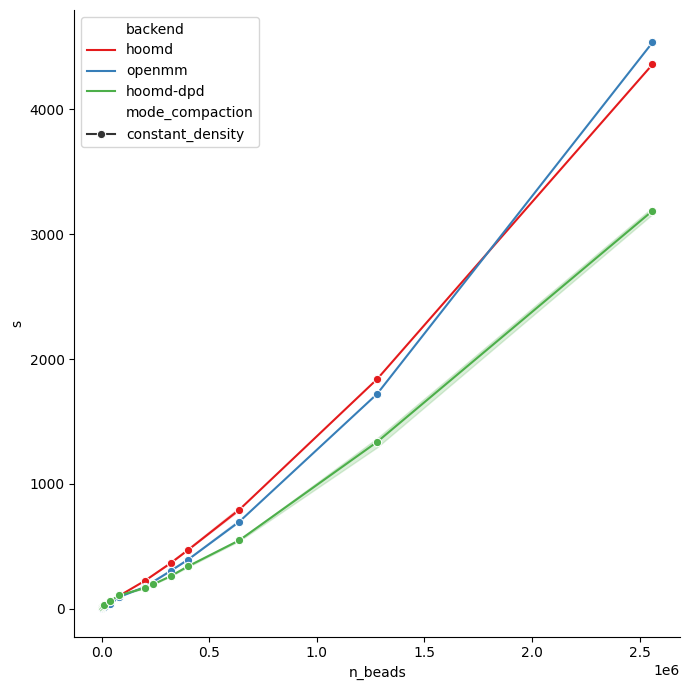

In [110]:
# Total runtime

plt.figure(figsize=[7, 7])
sns.lineplot(
    data=benchmark_table.query('mode_compaction=="constant_density" and backend!="hoomd-no-writing"'), 
            x='n_beads', y='s',
            hue='backend', 
            style='mode_compaction',
            markers=True, 
            palette='Set1',
            )

# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()